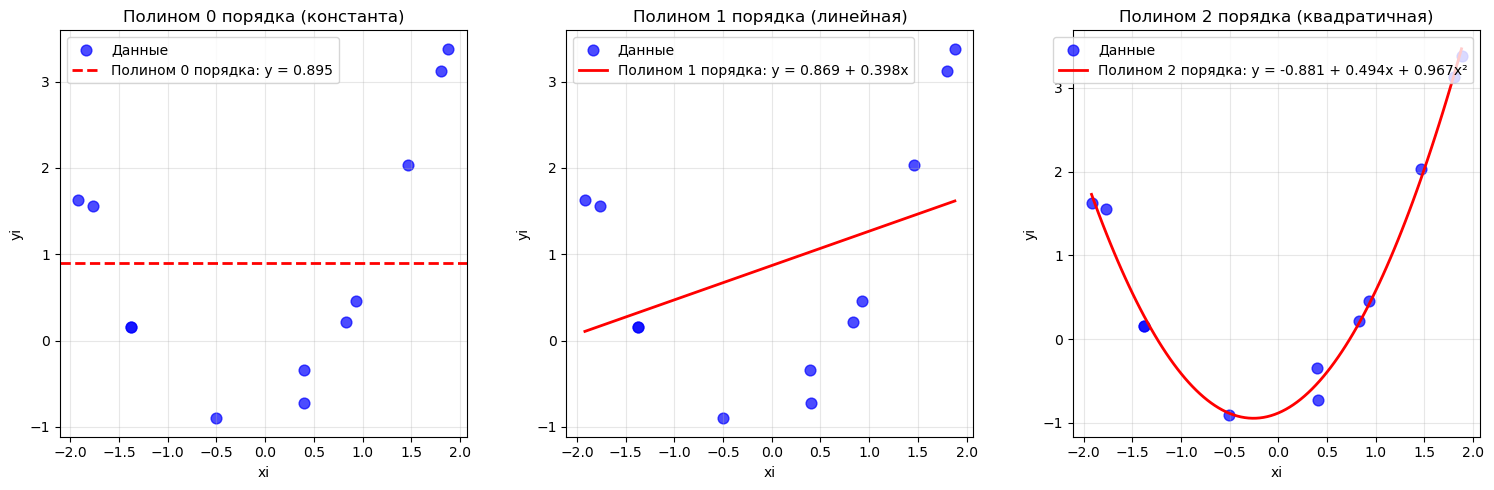

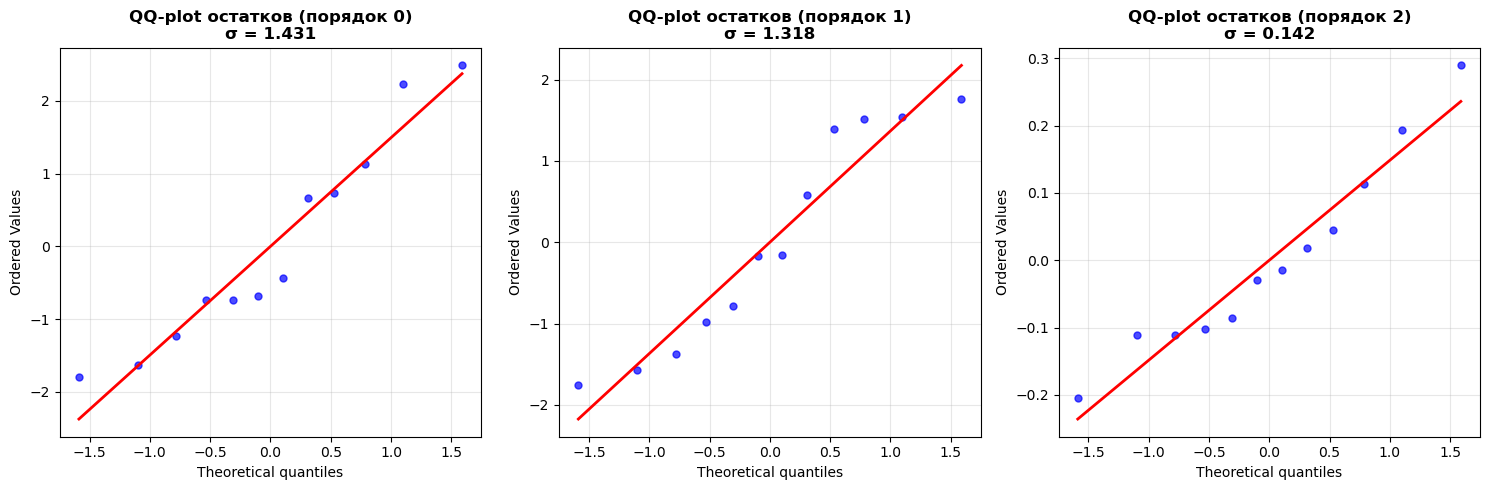

ОЦЕНКИ КОЭФФИЦИЕНТОВ И АНАЛИЗ ОСТАТКОВ

ПОЛИНОМ 0 ПОРЯДКА:
Оценки коэффициентов:
  a_0 = 0.8947

Статистика остатков:
  R² = -0.0000
  Стандартное отклонение остатков: 1.4312

Визуальная оценка нормальности (QQ-plot):
  Корреляция в QQ-plot: 0.9490
Заметное отклонение от нормального распределения

ПОЛИНОМ 1 ПОРЯДКА:
Оценки коэффициентов:
  a_0 = 0.8693
  a_1 = 0.3979

Статистика остатков:
  R² = 0.1518
  Стандартное отклонение остатков: 1.3181

Визуальная оценка нормальности (QQ-plot):
  Корреляция в QQ-plot: 0.9310
Заметное отклонение от нормального распределения

ПОЛИНОМ 2 ПОРЯДКА:
Оценки коэффициентов:
  a_0 = -0.8809
  a_1 = 0.4941
  a_2 = 0.9668

Статистика остатков:
  R² = 0.9902
  Стандартное отклонение остатков: 0.1418

Визуальная оценка нормальности (QQ-plot):
  Корреляция в QQ-plot: 0.9699
Умеренное соответствие нормальному распределению


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Данные
xi = np.array([-0.502, 1.803, 0.928, 0.395, -1.376, -1.376, -1.768, 1.465, 0.404, 0.832, -1.918, 1.880])
yi = np.array([-0.900, 3.124, 0.455, -0.342, 0.158, 0.159, 1.557, 2.031, -0.728, 0.217, 1.626, 3.380])

# МНК для полиномов порядка 0, 1, 2
def polynomial_regression(x, y, degree):
    # Создание матрицы плана
    X = np.column_stack([x**k for k in range(degree + 1)])
    
    # Оценка коэффициентов: a_hat = (X^T X)^(-1) X^T y
    a_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Предсказания
    y_pred = X @ a_hat
    
    # Остатки
    residuals = y - y_pred
    
    return a_hat, residuals, y_pred

# Вычисление для всех порядков
results = {}
degrees = [0, 1, 2]

for degree in degrees:
    a_hat, residuals, y_pred = polynomial_regression(xi, yi, degree)
    results[degree] = {
        'coefficients': a_hat,
        'residuals': residuals,
        'y_pred': y_pred
    }

# Визуализация: данные и модели
plt.figure(figsize=(15, 5))

# Исходные данные
plt.subplot(1, 3, 1)
plt.scatter(xi, yi, color='blue', alpha=0.7, s=60, label='Данные')
x_plot = np.linspace(xi.min(), xi.max(), 100)

# Модель порядка 0 (константа)
a0 = results[0]['coefficients'][0]
plt.axhline(y=a0, color='red', linestyle='--', linewidth=2, label=f'Полином 0 порядка: y = {a0:.3f}')

plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Полином 0 порядка (константа)')
plt.legend()
plt.grid(True, alpha=0.3)

# Модель порядка 1 (линейная)
plt.subplot(1, 3, 2)
plt.scatter(xi, yi, color='blue', alpha=0.7, s=60, label='Данные')
a0, a1 = results[1]['coefficients']
y_plot_1 = a0 + a1 * x_plot
plt.plot(x_plot, y_plot_1, 'red', linewidth=2, label=f'Полином 1 порядка: y = {a0:.3f} + {a1:.3f}x')

plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Полином 1 порядка (линейная)')
plt.legend()
plt.grid(True, alpha=0.3)

# Модель порядка 2 (квадратичная)
plt.subplot(1, 3, 3)
plt.scatter(xi, yi, color='blue', alpha=0.7, s=60, label='Данные')
a0, a1, a2 = results[2]['coefficients']
y_plot_2 = a0 + a1 * x_plot + a2 * x_plot**2
plt.plot(x_plot, y_plot_2, 'red', linewidth=2, label=f'Полином 2 порядка: y = {a0:.3f} + {a1:.3f}x + {a2:.3f}x²')

plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Полином 2 порядка (квадратичная)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# QQ-plot анализ остатков
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    residuals = results[degree]['residuals']
    
    # QQ-plot
    stats.probplot(residuals, dist="norm", plot=plt)
    
    # Настройка внешнего вида
    lines = plt.gca().get_lines()
    lines[0].set_marker('o')
    lines[0].set_markersize(5)
    lines[0].set_markerfacecolor('blue')
    lines[0].set_markeredgecolor('blue')
    lines[0].set_alpha(0.7)
    lines[1].set_color('red')
    lines[1].set_linewidth(2)
    
    # Статистика остатков
    mean_res = np.mean(residuals)
    std_res = np.std(residuals, ddof=1)
    
    plt.title(f'QQ-plot остатков (порядок {degree})\nσ = {std_res:.3f}', fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Детальная статистика по моделям
print("ОЦЕНКИ КОЭФФИЦИЕНТОВ И АНАЛИЗ ОСТАТКОВ")

for degree in degrees:
    coeffs = results[degree]['coefficients']
    residuals = results[degree]['residuals']
    
    print(f"\nПОЛИНОМ {degree} ПОРЯДКА:")
    print(f"Оценки коэффициентов:")
    for k, coeff in enumerate(coeffs):
        print(f"  a_{k} = {coeff:.4f}")
    
   # Статистика остатков
    RSS = np.sum(residuals**2)  # Residual Sum of Squares
    TSS = np.sum((yi - np.mean(yi))**2)  # Total Sum of Squares
    R2 = 1 - RSS/TSS if TSS != 0 else 0
    
    print(f"\nСтатистика остатков:")
    print(f"  R² = {R2:.4f}")
    print(f"  Стандартное отклонение остатков: {np.std(residuals, ddof=1):.4f}")
    
    # Анализ нормальности через визуальную оценку QQ-plot
    print(f"\nВизуальная оценка нормальности (QQ-plot):")
    
    # Количественная оценка отклонения от нормальности
    # через корреляцию в QQ-plot
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals)))
    sample_quantiles = np.sort(residuals)
    qq_correlation = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]
    
    print(f"  Корреляция в QQ-plot: {qq_correlation:.4f}")
    
    if qq_correlation > 0.975:
        print("Отличное соответствие нормальному распределению")
    elif qq_correlation > 0.95:
        print("Умеренное соответствие нормальному распределению")
    else:
        print("Заметное отклонение от нормального распределения")
